# Disurption Index

## 概要

Disruption Index [Disruptiveness, Disruptive Index, D-indexとも呼ばれる。以下D-index] は、[Funk and Owen-Smith (2017)]らによって経営工学で提唱されたものを[Wu et al. 2019]が科学計量学に持ち込んだもので、革新性を「ある論文がそれ以前の文脈と断絶する度合い」と考え、断絶性を引用によって測った指標。

論文と特許について分析し、「すべての分野にわたって平均破壊スコアが継続的に低下している」と報告した[Park et al. 2023]の論文は特に科学システムの内外に波紋を広げ、ここ数十年における（世界的な）科学システムの大幅な拡大にも関わらず、科学が勢いを失っているのかどうか、そしてなぜそのような問題を巡る世間の議論を引き起こすなど、D-indexに関する議論は社会的にも大きな関心を呼んだ。さらに多数の改良指標が提案されている。

一方で、時系列比較に意味がないなど複数の留意点があることが近年の分析[C. Leibel & L. Bornamnn 2023]からわかっており、使用する際には対象とするデータの特性や分析の目的に照らし合わせて、D-indexを使用することが適切か注意が必要である。

## なぜDisruption Indexを考えるのか

革新性を評価する多くの指標と同様に、DIは研究の重要度を測るために活用できる可能性を持った指標である。

### 政策への影響

研究は大きく漸進的(Incremental)研究と、革新的(Disruptive)研究があるとされており、漸進的研究に対しては計画が立てやすく、予算をつけ易い。一方で研究資金の配分を決定する際には革新的研究を適切に評価することで、新たな分野を開拓するような研究を捉えられれば研究競争力を大きく伸ばす可能性がある。

(もう少し厚みが欲しい？)

## Disruption Index関連での重要論文

What do we know about the disruption index in scientometrics? An overview of the literature

A review of the literature on citation impact indicators

## Disruption Indexの定義

![D definition](./supplementary/D_def.png)
![D example](./supplementary/D_example.png)

[Lingfei Wu et al. 2019]

Disruption Indexの利用 - 他の研究指標の関係

DIを用いて、研究の様々な変数と革新性との関連をみた研究を紹介する。ただし、一部の研究成果は#Disruption Indexの制約と限界の項で話すような点を考慮すると解釈が変わる可能性があり、結果は慎重に分析した上で受容する必要がある。

チームサイエンス（共著）

小規模なチームほど革新性、大規模なチームほどインパクト（＝引用数）が大きい[L. Wu et al. 2019]

分野別の成果

放射線医学[Omar et al. 2022]、外科医学[Becerra et al. 2021]、眼科[Patal et al. 2022]、ほか

エネルギー安全保障分野[Y. Jiang et al. 2023]

ナノ科学[Kong et al. 2023]

引用数など、他の指標との関連

ノーベル賞受賞論文の平均DIは全論文でトップ2%のDIに相当する[]

ノーベル賞受賞論文を引用、被引用している論文は多くがDIが正 [A.J.Yang et al 2023]

Journal Impact Factorsの代替として [Y. Jiang et al. 2023]

時間的変化

第二次世界大戦以降、学術論文や特許全体で次第にDisruptionが下がり続けている - [Park et al. 2023]Disurption Index

In [1]:
%pip install pyalex


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# colabで実行する時のためのコード
import sys
import os

%cd /content/sample_data/
!git clone https://github.com/ScisciJP/scisciJP2024_tutorial.git

sys.path.append('/content/sample_data/scisciJP2024_tutorial')
print(os.getcwd())
os.chdir('/content/sample_data/scisciJP2024_tutorial')
sys.path

[Errno 2] No such file or directory: '/content/sample_data/'
/disks/qnap2/notebook/t-yatima/scisciJP2024_tutorial
Cloning into 'scisciJP2024_tutorial'...


/home/t-yatima/t-yatima/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 169 (delta 64), reused 145 (delta 44), pack-reused 0
Receiving objects: 100% (169/169), 20.20 MiB | 23.34 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/disks/qnap2/notebook/t-yatima/scisciJP2024_tutorial


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/scisciJP2024_tutorial'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = '/disks/qnap2/data/t-yatima/scisciJP2024_tutorial/'
INPUT_WORKS_DF_PKL = DATA_DIR + 'random_works_df.pkl'
INPUT_CITATIONS_DF_PKL = DATA_DIR + 'random_rel_ref_df.pkl'


In [2]:
works_df = pd.read_pickle(INPUT_WORKS_DF_PKL)
citations_df = pd.read_pickle(INPUT_CITATIONS_DF_PKL)
display(works_df, citations_df)

,JournalId,Year,NumberCitations,Title,Date,DocType,Doi,PMID,Volume,Issue,FirstPage,LastPage,IsRetracted,IsParaText,AuthorCount
PublicationId,,,,,,,,,,,,,,,
2242094754,NaN,2005,0,Understanding what child protection data mean:...,2005-08-11,article,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2.0
2951317825,NaN,2015,0,Desvendando o Universo com o Céu da Serra Gaúcha,2015-11-30,article,NaN,NaN,3,3,NaN,NaN,False,False,4.0
3030572269,NaN,2018,0,The estrogen deficiency hypothesis of schizoph...,2018-12-05,article,10.3760/cma.j.issn.1006-7884.2018.06.010,NaN,51,6,385,388,False,False,1.0
353247501,NaN,1977,0,"金大中氏拉致事件(ドキュメント)--コリアゲ-トの決壊〔含 日誌,解説〕",1977-02-01,article,NaN,NaN,NaN,375,206,227,False,False,1.0
423748994,NaN,1957,0,フランス法におけるfonds de commerce(営業)について,1957-07-01,article,NaN,NaN,2,1,73,108,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2076168890,NaN,2010,25,Pozzolanic activity of Hwangtoh clay,2010-12-01,article,10.1016/j.conbuildmat.2010.04.061,NaN,24,12,2638,2645,False,False,4.0
2468394869,NaN,2017,29,Evaluation of the toxicity of fungicides to fl...,2017-01-01,article,10.1016/j.pestbp.2016.06.007,28043329,135,NaN,41,46,False,False,5.0
2011433783,NaN,2011,28,Altered metabolism of maternal micronutrients ...,2011-11-01,article,10.1016/j.mehy.2011.08.001,21890280,77,5,878,883,False,False,4.0


,source,target
0,2147314816,2147486095
1,2604406667,2267581838
2,4387491849,2045680610
3,4387749131,3112902030
4,4387747277,2619010848
...,...,...
97002303,2134763224,2036122427
97002304,2134763224,2065841427
97002305,2134806910,2005404203
97002306,2134806910,2070799870


In [97]:
works_df = works_df[works_df['DocType'] == 'article']
len(works_df)

37642

In [98]:
works_df.drop_duplicates(subset='Title', inplace=True)
len(works_df)

37249

### データの分布

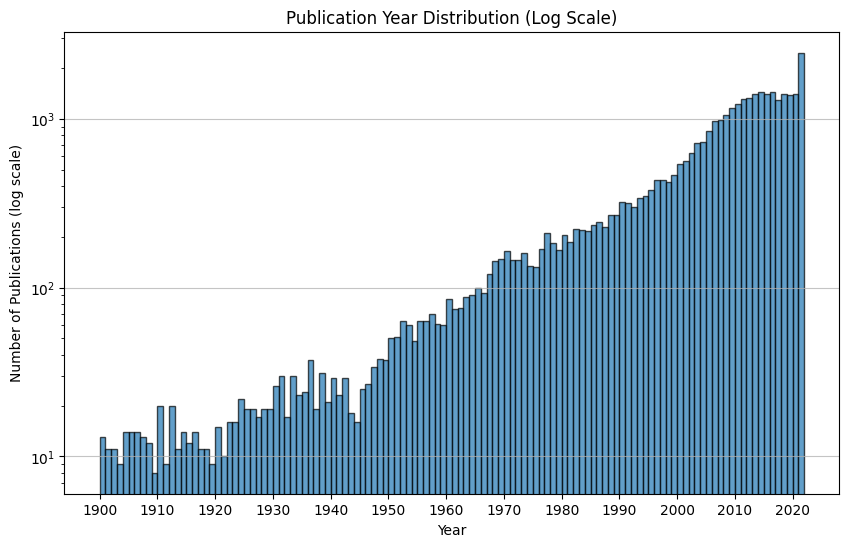

In [99]:
# works_df['Year']のヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(works_df['Year'], bins=range(1900, 2023), edgecolor='black', alpha=0.7, log=True)
plt.title("Publication Year Distribution (Log Scale)")
plt.xlabel("Year")
plt.ylabel("Number of Publications (log scale)")
plt.xticks(range(1900, 2023, 10))
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

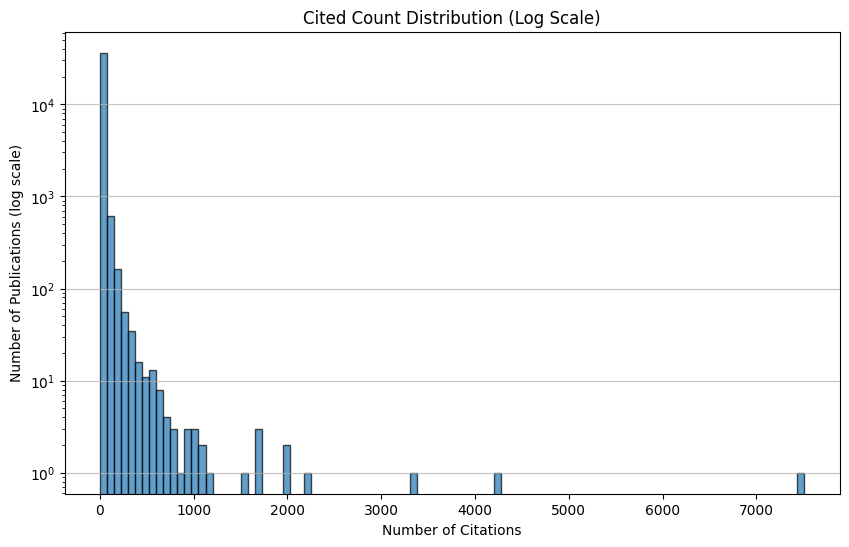

In [100]:
# works_df['NumberCitations']のヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(works_df['NumberCitations'], bins=100, edgecolor='black', alpha=0.7, log=True)
plt.title("Cited Count Distribution (Log Scale)")
plt.xlabel("Number of Citations")
plt.ylabel("Number of Publications (log scale)")
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

In [101]:
# ref_countsのヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(ref_counts, bins=100, edgecolor='black', alpha=0.7, log=True)
plt.title("References Count Distribution (Log Scale)")
plt.xlabel("Number of References")
plt.ylabel("Number of Publications (log scale)")
plt.grid(axis='y', alpha=0.75)

# ヒストグラムの表示
plt.show()

NameError: name 'ref_counts' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 7min
def citation_groupby(df_citation):
    '''source,targetのDataFrameを引用先，引用元ごとにgroupby
    
    input: source,targetをcolumnにもつedgeのDataFrame

    index: eid
    source: indexが引用先となる論文群(sourceが新しい)
    target: indexが引用元となる論文群(targetが古い)
    '''
    
    citations_source_gp = df_citation.groupby('source').agg(list)
    citations_target_gp = df_citation.groupby('target').agg(list)
    df_citation_gp = pd.concat([citations_source_gp,citations_target_gp],axis = 1)
    return df_citation_gp

citations_gb = citation_groupby(citations_df)
citations_gb

,target,source
285,"[2042492557, 2127278384, 2136596860, 259957213...",NaN
417,"[1527311855, 1983741276, 2053120142, 208064788...",NaN
662,[2064918098],NaN
763,"[117192379, 134541578, 1526091749, 1965079780,...",NaN
1091,"[2018037215, 2339183141]",NaN
...,...,...
4386280481,NaN,[4388483438]
4386419348,NaN,"[4387365856, 4387903145]"
4386637234,NaN,"[3180041995, 3082985568, 3086726274, 297062346..."
4387427222,NaN,[1977219467]


In [ ]:
citations_gb[citations_gb['source'].notna()]

,target,source
66583,"[2010507423, 2091670113]",[1990508873]
136660,[2165612380],"[2139545465, 2740998197, 63172045, 2116757832,..."
138594,"[1506013714, 1979995768, 2023953172, 205179336...","[4307716840, 2007802976, 2119910553, 198831451..."
229794,"[2019208468, 2041833143, 2063371974]","[4248751215, 2019849620, 842246, 1984401607, 4..."
288318,[2009958179],"[1995880072, 2567240551, 2978657344, 319917174..."
...,...,...
4386280481,NaN,[4388483438]
4386419348,NaN,"[4387365856, 4387903145]"
4386637234,NaN,"[3180041995, 3082985568, 3086726274, 297062346..."
4387427222,NaN,[1977219467]


In [ ]:
citations_gb['year'] = citations_gb.index.map(works_df['Year'])
citations_gb

,target,source,year
285,"[2042492557, 2127278384, 2136596860, 259957213...",NaN,NaN
417,"[1527311855, 1983741276, 2053120142, 208064788...",NaN,NaN
662,[2064918098],NaN,NaN
763,"[117192379, 134541578, 1526091749, 1965079780,...",NaN,NaN
1091,"[2018037215, 2339183141]",NaN,NaN
...,...,...,...
4386280481,NaN,[4388483438],NaN
4386419348,NaN,"[4387365856, 4387903145]",NaN
4386637234,NaN,"[3180041995, 3082985568, 3086726274, 297062346...",NaN
4387427222,NaN,[1977219467],NaN


### Disruption Indexの計算

In [ ]:
flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

def get_score(node):
    try:
        node_r = set(citations_gb.target.loc[node])
        node_r_c = set(flatten2([citations_gb.source.loc[x] for x in node_r])) - set([node])
        node_c = set(citations_gb.source.loc[node])
        allnodes = node_c | node_r_c
        cite_target = node_c - node_r_c
        cite_targetref = node_r_c - node_c
        cite_target_targetref_both = node_r_c & node_c
        score = (len(cite_target)*1 + len(cite_target_targetref_both)*-1 + len(cite_targetref)*0)/len(allnodes)
        return score
    except:
        return None

In [102]:
# 17min
eids = works_df.index

res = []
for n, eid in enumerate(eids):
    if n % 5000 == 0: print(f'{n} / {len(works_df)}')
    res.append(get_score(eid))
scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])

scores.index = scores[0]
scores['team_size'] = scores[0].map(works_df['AuthorCount'])
display(scores)

0 / 37249


5000 / 37249
10000 / 37249
15000 / 37249
20000 / 37249
25000 / 37249
30000 / 37249
35000 / 37249


,0,1,team_size
0,,,
2242094754,2242094754,NaN,2.0
2951317825,2951317825,NaN,4.0
3030572269,3030572269,NaN,1.0
353247501,353247501,NaN,1.0
423748994,423748994,NaN,1.0
...,...,...,...
2110634737,2110634737,-0.006842,4.0
2076168890,2076168890,-0.003546,4.0
2468394869,2468394869,0.001149,5.0


In [103]:
scores[~scores[1].isna()]

,0,1,team_size
0,,,
2102983573,2102983573,0.000000,1.0
2170217184,2170217184,0.004845,10.0
2332852995,2332852995,0.048000,1.0
2027815162,2027815162,0.074074,1.0
1993059412,1993059412,0.001247,3.0
...,...,...,...
2110634737,2110634737,-0.006842,4.0
2076168890,2076168890,-0.003546,4.0
2468394869,2468394869,0.001149,5.0


### DIの分布

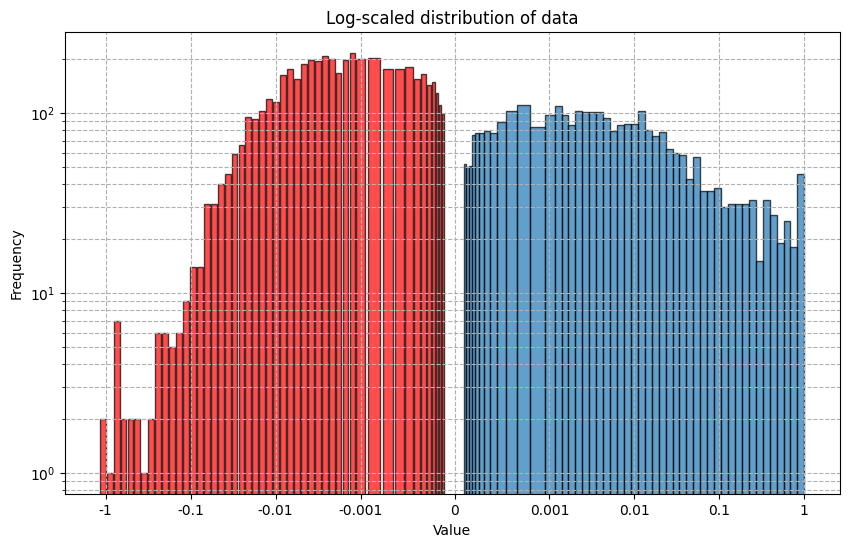

In [104]:
data = scores[1]

# データを正と負で分割
data_pos = data[data > 0]
data_neg = data[data < 0]

# ビンのエッジを定義
bins_pos = np.logspace(-4, 0, num=50)
bins_neg = -np.logspace(-4, 0, num=50)[::-1]

# ヒストグラムをプロット
plt.figure(figsize=(10, 6))

# 正のデータ
hist_pos, edges_pos = np.histogram(data_pos, bins=bins_pos)
plt.bar(edges_pos[:-1], hist_pos, width=np.diff(edges_pos), align='edge', edgecolor='black', alpha=0.7)

# 負のデータ
hist_neg, edges_neg = np.histogram(data_neg, bins=bins_neg)
plt.bar(edges_neg[:-1], hist_neg, width=-np.diff(edges_neg), align='edge', edgecolor='black', alpha=0.7, color='r')

# 軸を対数スケールに設定
plt.xscale('symlog', linthresh=0.001)
plt.yscale('log')

# x軸の目盛りをカスタマイズ
ticks = [-10**i for i in range(0, -4, -1)] + [0] + [10**-i for i in range(3, -1, -1)]
plt.xticks(ticks, labels=[str(tick) for tick in ticks])

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Log-scaled distribution of data')
plt.grid(True, which="both", ls="--")

plt.show()

#### Lingfei Wuのコード借用

In [105]:
D = filtered_df[1].to_list()
D[:5]

[0.0, 0.0048449612403100775, 0.048, 0.07407407407407407, 0.0012468827930174563]

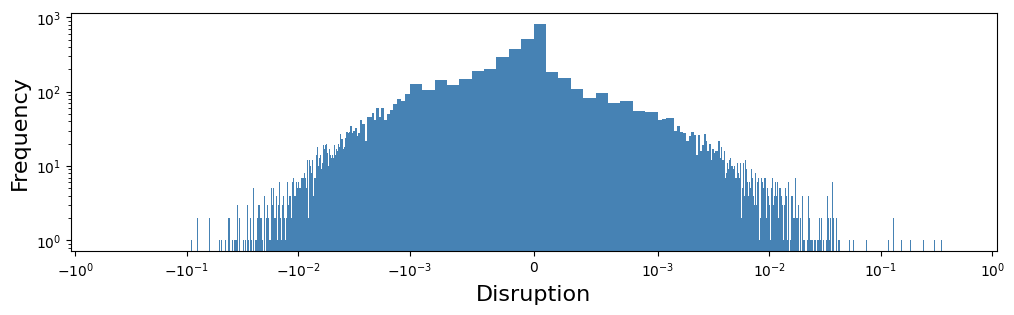

In [106]:

nbins=20000
fig = plt.figure(figsize=(10, 3),facecolor='white')
ax = fig.add_subplot(111)
#
N, bins, patches = ax.hist(D, bins=nbins,edgecolor='white', linewidth=0)
LN=np.log(max(N))


# Find fractions of small natural denominator and make them less distractive
delta=bins[1]-bins[0]
peaks=set([j/i for i in range(1,100) for j in range(1,i)]+\
[-j/i for i in range(1,100) for j in range(1,i)]) 
ys=dict((i,(patches[i-1]._height+patches[i+1]._height)*0.5) \
        for i in range(1,len(N)-2)) #smooth color

for i,z in zip(range(0,nbins),bins):
    if patches[i]._height>0: # only plot patches with values
        r=(np.log(patches[i]._height)/LN)**5 # transparency scales to y values
        for p in peaks:
            if z<p<z+delta and 0<i<len(N):
                r=(np.log(ys[i]+1)/LN)**5 # disruption fraction
        patches[i].set_alpha(1)
        patches[i].set_facecolor(color='SteelBlue')

#
plt.yscale('log')
plt.xscale('symlog',linthresh=0.001)
plt.tight_layout()
plt.xlabel('Disruption',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
#plt.savefig(path+'Fig1b.pdf')
plt.show()

In [107]:
scores_notna = scores[scores[1].notna() & scores['team_size'].notna()].drop(columns=0)
scores_notna

,1,team_size
0,,
2102983573,0.000000,1.0
2170217184,0.004845,10.0
2332852995,0.048000,1.0
2027815162,0.074074,1.0
1993059412,0.001247,3.0
...,...,...
2110634737,-0.006842,4.0
2076168890,-0.003546,4.0
2468394869,0.001149,5.0


In [108]:
scores_notna['year'] = works_df['Year']
scores_notna['cited_count'] = works_df['NumberCitations']
# scores_notna['ref_count'] = ref_counts
scores_notna

,1,team_size,year,cited_count
0,,,,
2102983573,0.000000,1.0,2002,3
2170217184,0.004845,10.0,2006,50
2332852995,0.048000,1.0,1942,18
2027815162,0.074074,1.0,1999,2
1993059412,0.001247,3.0,1990,1
...,...,...,...,...
2110634737,-0.006842,4.0,2007,28
2076168890,-0.003546,4.0,2010,25
2468394869,0.001149,5.0,2017,29


In [109]:
scores_filtered = scores_notna[(scores_notna['year'] < 2018) & (scores_notna['year'] > 1950) & (scores_notna['cited_count'] > 10)]# & (scores_notna['ref_count'] > 10)]
scores_filtered

,1,team_size,year,cited_count
0,,,,
2170217184,0.004845,10.0,2006,50
2055909729,-0.006706,3.0,1984,30
2134455278,-0.000613,3.0,2013,13
1970908398,0.102564,2.0,1952,38
2096425138,0.004621,2.0,2002,14
...,...,...,...,...
2110634737,-0.006842,4.0,2007,28
2076168890,-0.003546,4.0,2010,25
2468394869,0.001149,5.0,2017,29


### チームサイズとの関係

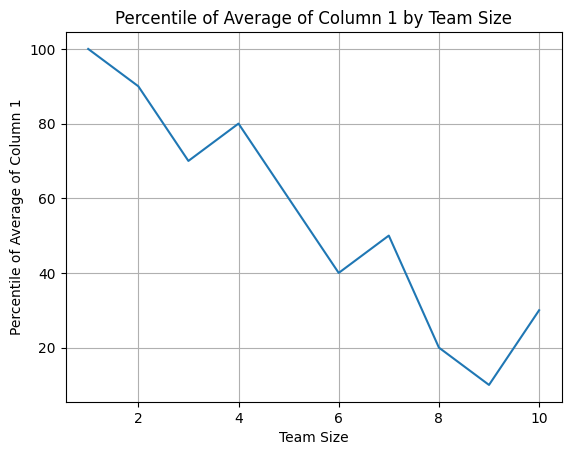

In [110]:
# team_sizeが1から10までのデータを抽出
filtered_df = scores_notna[scores_notna['team_size'].between(1, 10)]

# team_sizeごとにグループ化し、1というカラムの平均値を計算
grouped_df = filtered_df.groupby('team_size').mean()

# 全体の平均値のパーセンタイルを計算
percentiles = grouped_df.rank(pct=True) * 100

# グラフの描画
plt.plot(percentiles.index, percentiles[1])
plt.xlabel('Team Size')
plt.ylabel('Percentile of Average of Column 1')
plt.title('Percentile of Average of Column 1 by Team Size')
plt.grid(True)
plt.show()


team_size
1.0     100.0
2.0      80.0
3.0      40.0
4.0      90.0
5.0      70.0
6.0      50.0
7.0      60.0
8.0      30.0
9.0      20.0
10.0     10.0
Name: 1, dtype: float64


/tmp/ipykernel_475474/3673049884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cited_count'] = pd.to_numeric(filtered_df['cited_count'], errors='coerce')
/tmp/ipykernel_475474/3673049884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=['cited_count'], inplace=True)
/tmp/ipykernel_475474/3673049884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

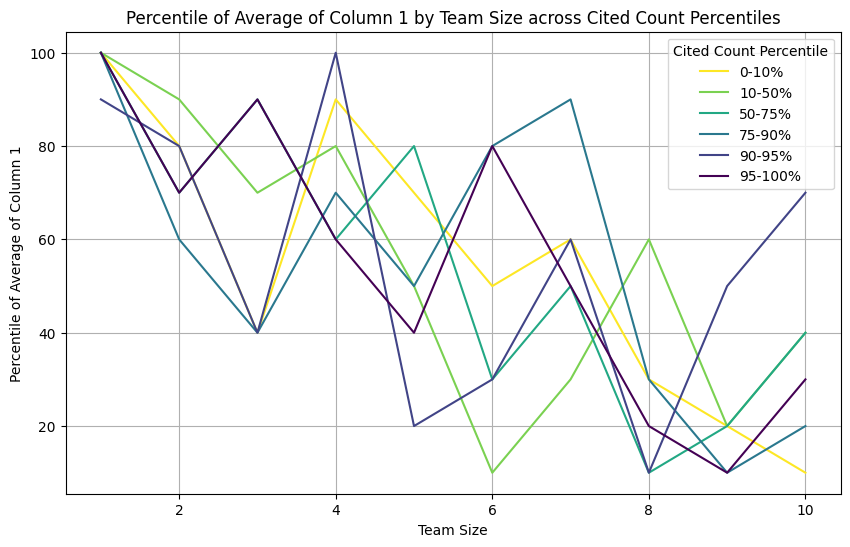

In [111]:
# パーセントの値がキリ良すぎるので何か間違っていそう
# cited_countのパーセンタイルに基づいてデータを分割
percentile_ranges = [(0, 10), (10, 50), (50, 75), (75, 90), (90, 95), (95, 100)]
filtered_df['cited_count'] = pd.to_numeric(filtered_df['cited_count'], errors='coerce')
filtered_df.dropna(subset=['cited_count'], inplace=True)
filtered_df['cited_percentile'] = pd.qcut(filtered_df['cited_count'], [0, .1, .5, .75, .9, .95, 1], labels=False)

# 各パーセンタイル範囲での平均値のパーセンタイルを計算し、グラフに描画
plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(1, 0, len(percentile_ranges)))  # 色のグラデーションを設定

for i, (low, high) in enumerate(percentile_ranges):
    subset = filtered_df[(filtered_df['cited_percentile'] == i)]
    grouped = subset.groupby('team_size')[1].mean()
    percentiles = grouped.rank(pct=True) * 100
    if i == 0: print(percentiles)
    plt.plot(grouped.index, percentiles, label=f'{low}-{high}%', color=colors[i])

plt.xlabel('Team Size')
plt.ylabel('Percentile of Average of Column 1')
plt.title('Percentile of Average of Column 1 by Team Size across Cited Count Percentiles')
plt.legend(title='Cited Count Percentile')
plt.grid(True)
plt.show()

In [112]:
filtered_df

,1,team_size,year,cited_count,cited_percentile
0,,,,,
2102983573,0.000000,1.0,2002,3,1
2170217184,0.004845,10.0,2006,50,3
2332852995,0.048000,1.0,1942,18,2
2027815162,0.074074,1.0,1999,2,1
1993059412,0.001247,3.0,1990,1,0
...,...,...,...,...,...
2110634737,-0.006842,4.0,2007,28,2
2076168890,-0.003546,4.0,2010,25,2
2468394869,0.001149,5.0,2017,29,2


In [113]:
filtered_df[filtered_df['cited_percentile'] == 5]

,1,team_size,year,cited_count,cited_percentile
0,,,,,
2116052628,-0.003631,4.0,2003,174,5
2187913747,-0.090580,4.0,1963,139,5
2140599671,0.000019,5.0,2011,136,5
2007787415,0.127358,1.0,2004,114,5
2026107832,-0.028212,2.0,2011,134,5
...,...,...,...,...,...
2181960425,0.074431,2.0,2002,125,5
2057257702,-0.045361,10.0,1987,127,5
2742624406,-0.008927,6.0,2017,122,5


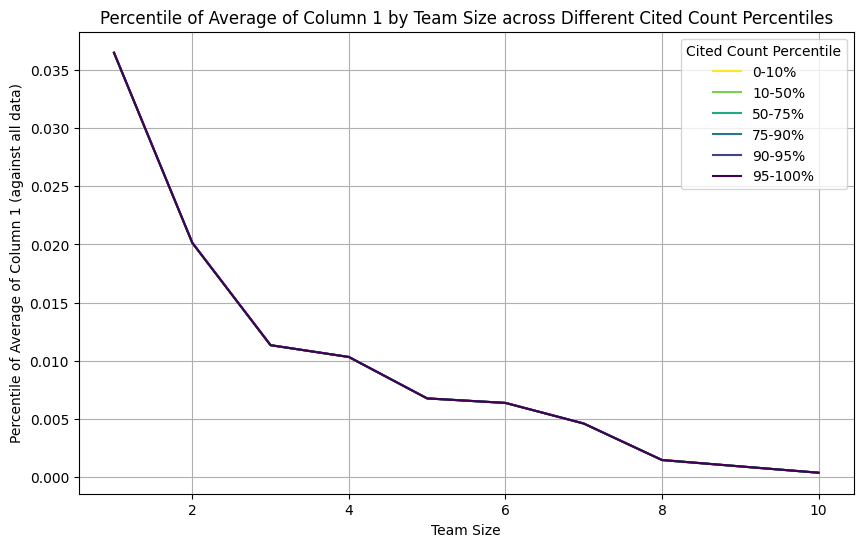

In [114]:
# 同じ線上に被ってしまうので何か間違ってる
grouped_all = filtered_df.groupby('team_size')[1].mean().reset_index()

plt.figure(figsize=(10, 6))

# cited_countのパーセンタイル範囲ごとにデータをプロット
for i, percentile_range in enumerate(percentile_ranges):
    subset = filtered_df[(filtered_df['cited_percentile'] == i) & filtered_df['team_size'].between(1, 10)]
    grouped_subset = subset.groupby('team_size')[1].mean().reset_index()
    # データ全体の分布を用いてパーセンタイルを計算
    percentiles = [np.percentile(grouped_all[1], x) for x in np.linspace(100, 0, len(grouped_subset))]
    plt.plot(grouped_subset['team_size'], percentiles, label=f'{percentile_range[0]}-{percentile_range[1]}%', color=colors[i])

plt.xlabel('Team Size')
plt.ylabel('Percentile of Average of Column 1 (against all data)')
plt.title('Percentile of Average of Column 1 by Team Size across Different Cited Count Percentiles')
plt.legend(title='Cited Count Percentile')
plt.grid(True)
plt.show()


#### Lingfei Wuのコード借用


In [115]:
filtered_df

,1,team_size,year,cited_count,cited_percentile
0,,,,,
2102983573,0.000000,1.0,2002,3,1
2170217184,0.004845,10.0,2006,50,3
2332852995,0.048000,1.0,1942,18,2
2027815162,0.074074,1.0,1999,2,1
1993059412,0.001247,3.0,1990,1,0
...,...,...,...,...,...
2110634737,-0.006842,4.0,2007,28,2
2076168890,-0.003546,4.0,2010,25,2
2468394869,0.001149,5.0,2017,29,2


In [116]:
from scipy import stats
import matplotlib.cm as cm
from collections import defaultdict

DisImpact=defaultdict(lambda:defaultdict(lambda:[]))
n=0
for disruption,teamsize,referenceAge,impact, _ in filtered_df.itertuples(index=False):
    n+=1
    if n%100000==0:
        flushPrint(str(n/100000))
    if 1<=teamsize<=10 and impact>0:
        if impact<=1:
            ilevel=1
        if 1<impact<10:
            ilevel=2
        if 10<=impact<24:
            ilevel=3           
        if 24<=impact<53:
            ilevel=4           
        if 53<=impact<84:
            ilevel=5
        if impact>=84:
            ilevel=6
        DisImpact[ilevel][teamsize].append(disruption)

In [117]:
DisruptionPaper = filtered_df[1]

In [118]:
disImpact={}
disImpact1={}
for ilevel in [1,2,3,4,5,6]:
    disImpact[ilevel]=sorted([(k,stats.percentileofscore(DisruptionPaper, np.mean(v)))\
                                   for k,v in DisImpact[ilevel].items()])
    disImpact1[ilevel]=sorted([(k,np.mean(v)) for k,v in DisImpact[ilevel].items()])


In [119]:
disImpact

{1: [(1.0, 94.47895100069013),
  (2.0, 91.82194616977225),
  (3.0, 87.09454796411318),
  (4.0, 92.76512537382102),
  (5.0, 89.86657464918333),
  (6.0, 87.31308948700253),
  (7.0, 89.38348286174373),
  (8.0, 85.79480101219231),
  (9.0, 62.767425810904065),
  (10.0, 46.95192086496434)],
 2: [(1.0, 93.69680239245456),
  (2.0, 92.25902921555095),
  (3.0, 87.16356107660455),
  (4.0, 86.55394524959742),
  (5.0, 83.3218311479181),
  (6.0, 78.09983896940419),
  (7.0, 82.85024154589371),
  (8.0, 84.85162180814355),
  (9.0, 82.965263400046),
  (10.0, 83.35633770416379)],
 3: [(1.0, 90.9247757073844),
  (2.0, 90.34966643662295),
  (3.0, 89.38348286174373),
  (4.0, 86.5884518058431),
  (5.0, 89.60202438463307),
  (6.0, 25.33931446974925),
  (7.0, 84.42604094778007),
  (8.0, 19.093627789279964),
  (9.0, 77.5132275132275),
  (10.0, 77.26017943409248)],
 4: [(1.0, 92.08649643432251),
  (2.0, 88.10674028065331),
  (3.0, 83.39084426040947),
  (4.0, 88.50931677018633),
  (5.0, 81.20542903151598),
  (6.0

1
2
3
4
5
6


/tmp/ipykernel_475474/3814888705.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = cm.get_cmap('summer_r',7)


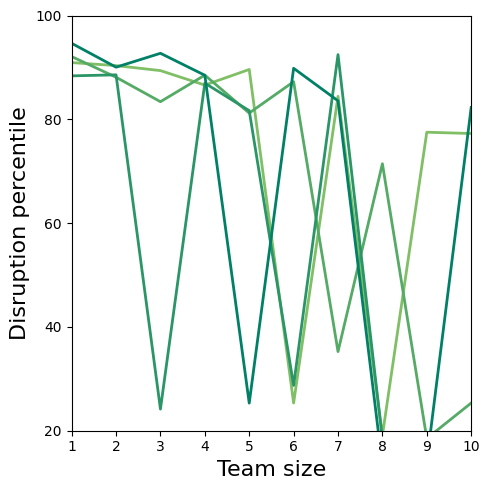

In [120]:
fig = plt.figure(figsize=(5,5),facecolor='white')
cmap1 = cm.get_cmap('summer_r',7)
ax = fig.add_subplot(111)
ip={1:'0-10',2:'10-50',3:'50-75',4:'75-90',5:'90-95',6:'95-100'}
for ilevel in [1,2,3,4,5,6]:
    print(ilevel)
    if ilevel == 1 or ilevel == 2: continue
    x,y=np.array(disImpact[ilevel]).T
    plt.plot(x,y,color=cmap1(ilevel),linewidth=2,alpha=1,label=ip[ilevel])
ax.set_xlim(1,10)
ax.set_ylim(20,100)
ax.set_yticks([20,40,60,80,100])
plt.xlabel('Team size',fontsize=16)
plt.ylabel('Disruption percentile',fontsize=16)

plt.tight_layout()
#plt.savefig('~/Fig3a.pdf')


### 高DIな論文を見てみる

In [121]:
filtered_df[filtered_df[1] > 0.92].merge(works_df, left_index=True, right_index=True)

,1,team_size,year,cited_count,cited_percentile,JournalId,Year,NumberCitations,Title,Date,DocType,Doi,PMID,Volume,Issue,FirstPage,LastPage,IsRetracted,IsParaText,AuthorCount
1996985697,1.000000,1.0,1903,1,0,NaN,1903,1,CONSERVATIVE SURGERY OF THE TUBES AND OVARIES,1903-03-01,article,10.1111/j.1471-0528.1903.tb06905.x,NaN,NaN,NaN,NaN,NaN,False,False,1.0
826836893,1.000000,1.0,2011,1,0,NaN,2011,1,Zielone drogi - przyszłość dla zrównoważonej E...,2011-01-01,article,NaN,NaN,NaN,NaN,176,181,False,False,1.0
135020798,1.000000,1.0,2007,1,0,NaN,2007,1,Tax Laws Amendment (Simplified Superannuation)...,2007-01-01,article,NaN,NaN,NaN,NaN,NaN,NaN,False,False,1.0
2017636102,1.000000,5.0,2014,1,0,NaN,2014,1,Virtual factory for PCB and thick-film circuit...,2014-05-01,article,10.1109/isse.2014.6887644,NaN,NaN,NaN,NaN,NaN,False,False,5.0
1999665338,1.000000,2.0,1993,1,0,NaN,1993,1,Influence of grinding of a titanium powder on ...,1993-10-01,article,10.1007/bf00862762,NaN,NaN,NaN,NaN,NaN,False,False,2.0
2489293358,1.000000,1.0,2003,1,0,NaN,2003,1,Will CDC-Recommended Vaccine Abbreviations Red...,2003-08-01,article,10.1177/001857870303800808,NaN,NaN,NaN,NaN,NaN,False,False,1.0
1982793646,1.000000,2.0,1989,7,1,NaN,1989,7,Design Procedures for Fiber Composite Box Beams,1989-07-01,article,10.1177/073168448900800404,NaN,8,4,370,397,False,False,2.0
2774138706,1.000000,2.0,1983,5,1,NaN,1983,5,Sexual Harassment: A Problem for Small Businesses,1983-01-01,article,10.1177/104225878300700309,NaN,7,3,45,50,False,False,2.0
2115625647,1.000000,4.0,2012,10,1,NaN,2012,10,EU Environmental Prohibition on Hazardous Subs...,2012-03-30,article,10.7464/ksct.2012.18.1.001,NaN,18,1,1,13,False,False,4.0
2914187441,1.000000,4.0,2018,2,1,NaN,2018,2,Examination of the lung and liver for patholog...,2018-10-23,article,10.4314/nvj.v39i3.9,NaN,39,3,263,268,False,False,4.0


### ネットワークの可視化

In [122]:
related_ref_df = citations_df
temp = scores_notna[scores_notna[1] > 0.9].index.values
for i in temp:
    works_target = related_ref_df[related_ref_df["source"]==int(i)]
    works_source = related_ref_df[related_ref_df["target"].isin(works_target["target"].values)]
    if(len(works_source["source"].unique())<50):
        print(i, len(works_source["source"].unique()))

1996985697 1
826836893 1
135020798 1
2020649193 1
2017636102 1
1999665338 1
2489293358 1
1982793646 1
2774138706 1
2115625647 1
2914187441 1
2162643626 1


KeyboardInterrupt: 

In [ ]:
import time
from pyalex import Works

ID = 2322070845 

works_target = related_ref_df[related_ref_df["source"]==ID]
works_source = related_ref_df[related_ref_df["target"].isin(works_target["target"].values)]
works_citing = related_ref_df[related_ref_df["target"]==ID]

edges = [tuple(row) for _, row in works_source[["target","source"]].iterrows()] + [tuple(row) for _, row in works_citing[["target","source"]].iterrows()]
nodes = set([item for sublist in edges for item in sublist])

node_detail = None
for id in nodes:
    node_detail = pd.concat([node_detail,pd.DataFrame(Works().filter(ids={"openalex":"W"+str(id)}).select(["title","publication_date"]).get(), index=[id])])
node_detail = node_detail.fillna(value={"title": "No title"})

node_detail["unix_time"] = node_detail["publication_date"].apply(lambda t: int(time.mktime(time.strptime(t, "%Y-%m-%d"))))
node_detail["date_diff"] = node_detail["unix_time"] - node_detail.loc[ID, "unix_time"]

In [ ]:
def get_nodetypes(c,  s, t):
    nodes_b = set(c) & set(s) 
    nodes_f = set(c) - set(s)
    nodes_r = set(s) - set(c) - set(t)
    return nodes_b, nodes_f, nodes_r

nodes_b,nodes_f, nodes_r = get_nodetypes(works_citing["source"].unique(), works_source["source"].unique(),works_target["target"].unique())

node_detail.loc[list(nodes_b), "type"] = 1
node_detail.loc[list(nodes_f), "type"] = 2 
node_detail.loc[list(nodes_r), "type"] = 3
node_detail = node_detail.fillna({"type": -1})

node_detail.loc[ID, "type"] = 0

import random
import math
color = ["black", "red","green","gold","grey"]
node_detail["color"] = node_detail["type"].apply(lambda x: color[int(x)])
node_detail["ypos"] = -(node_detail["type"]-2)*15+np.array([(random.random()-0.5)*20 for _ in range(len(node_detail))])
node_detail.loc[ID, "ypos"] = 0
node_detail["xpos"] = node_detail["date_diff"]/10000000 +50*np.sign(node_detail["type"])
node_detail.loc[ID, "xpos"] = 0
node_detail["size"] = 10
node_detail.loc[ID, "size"] = 30

node_detail.sort_values(by="type")

,title,publication_date,unix_time,date_diff,type,color,ypos,xpos,size
2062130584,Beitrag zum Farbensinn und Formensinn der Biene,1937-01-01,-1041411600,-1420070400,-1.0,grey,43.769891,-192.00704,10
2554445478,New Experiments on Colour Vision in Bees,1939-01-01,-978339600,-1356998400,-1.0,grey,51.871600,-185.69984,10
2322070845,The Theory of Meaning,1982-01-01,378658800,0,0.0,black,0.000000,0.00000,30
2054420480,Process-Product Dynamics: The Role of Othernes...,2013-11-21,1384959600,1006300800,2.0,green,6.509720,150.63008,10
2619833632,Biodiversity Assessment in Temperate Biomes us...,2017-05-23,1495465200,1116806400,2.0,green,-5.956918,161.68064,10
...,...,...,...,...,...,...,...,...,...
2088511873,Die Bedeutung waagerecht liegender Augenteile ...,1939-01-01,-978339600,-1356998400,3.0,gold,-8.589222,-85.69984,10
2116449759,THE CONTRIBUTIONS OF SIR JOHN LUBBOCK (LORD AV...,1965-04-01,-150022800,-528681600,3.0,gold,-9.290788,-2.86816,10
2165012809,How Bees Discriminate a Pattern of Two Colours...,2015-01-24,1422025200,1043366400,3.0,gold,-23.885221,154.33664,10
147677848,Spatial Vision in Arthropods,1981-01-01,347122800,-31536000,3.0,gold,-24.673092,46.84640,10


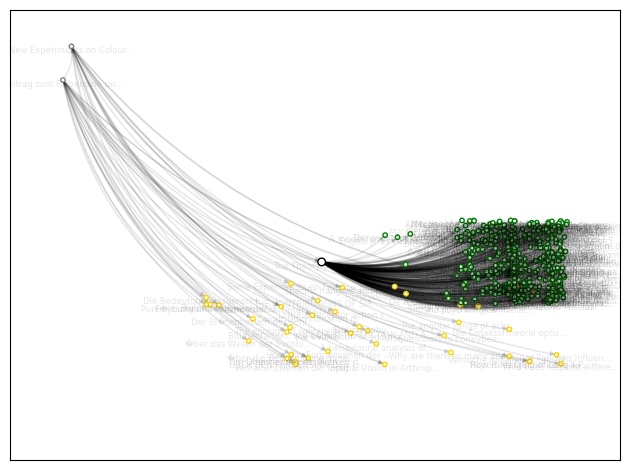

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from(edges)
nodes_pos = {v:(node_detail.loc[v,"xpos"],node_detail.loc[v,"ypos"]) for v in node_detail.index}
max_length = 25  # Maximum length of the title
node_labels = {node: node_detail.loc[node, 'title'][:max_length] + "..." if len(node_detail.loc[node, 'title']) > max_length else node_detail.loc[node, 'title'] for node in G.nodes()}
label_pos = {v:(node_detail.loc[v,"xpos"],node_detail.loc[v,"ypos"]-1) for v in node_detail.index}

node_colors = [node_detail.loc[node,'color'] for node in G.nodes()]
node_sizes = [node_detail.loc[node,'size'] for node in G.nodes()]

nx.draw_networkx_edges(G,nodes_pos, arrows=True,node_size=2, connectionstyle="arc3, rad=0.2", alpha= 0.1, arrowsize=7)
nx.draw_networkx_labels(G, pos=label_pos, labels=node_labels, font_size=6, alpha=0.1)
nx.draw_networkx_nodes(G,nodes_pos, node_size=node_sizes, node_shape='o',edgecolors=node_colors,node_color="white",linewidths=1, alpha= 1)
plt.tight_layout()
plt.show()
plt.close()
